In [2]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [3]:
cap = cv2.VideoCapture(0)
cv2.namedWindow("Window")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while True:
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

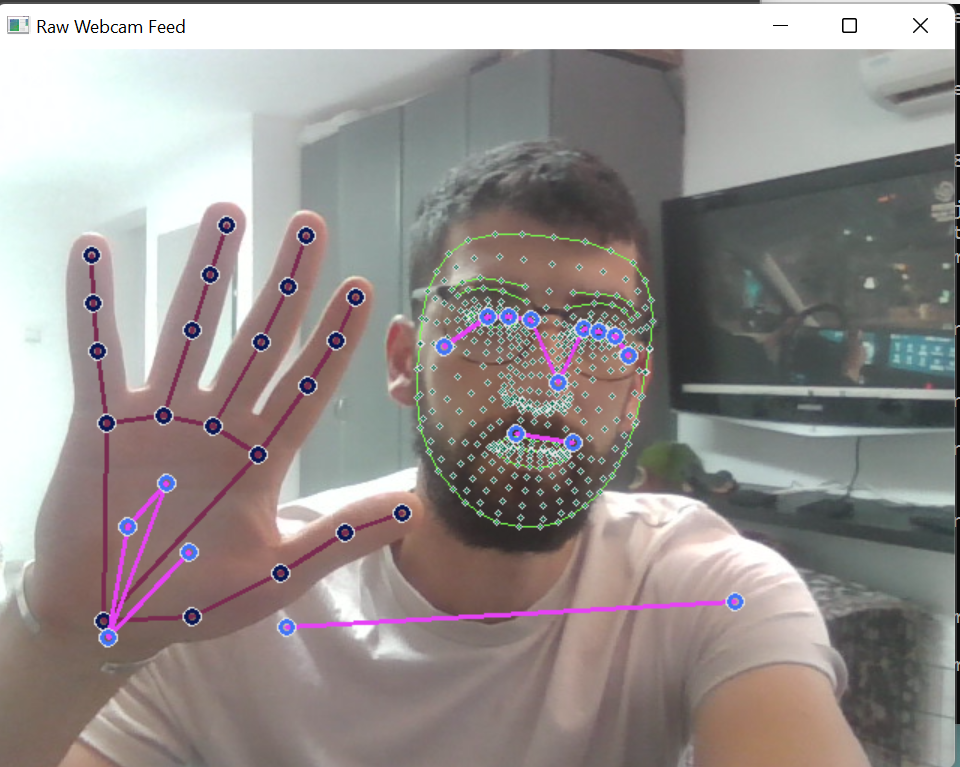
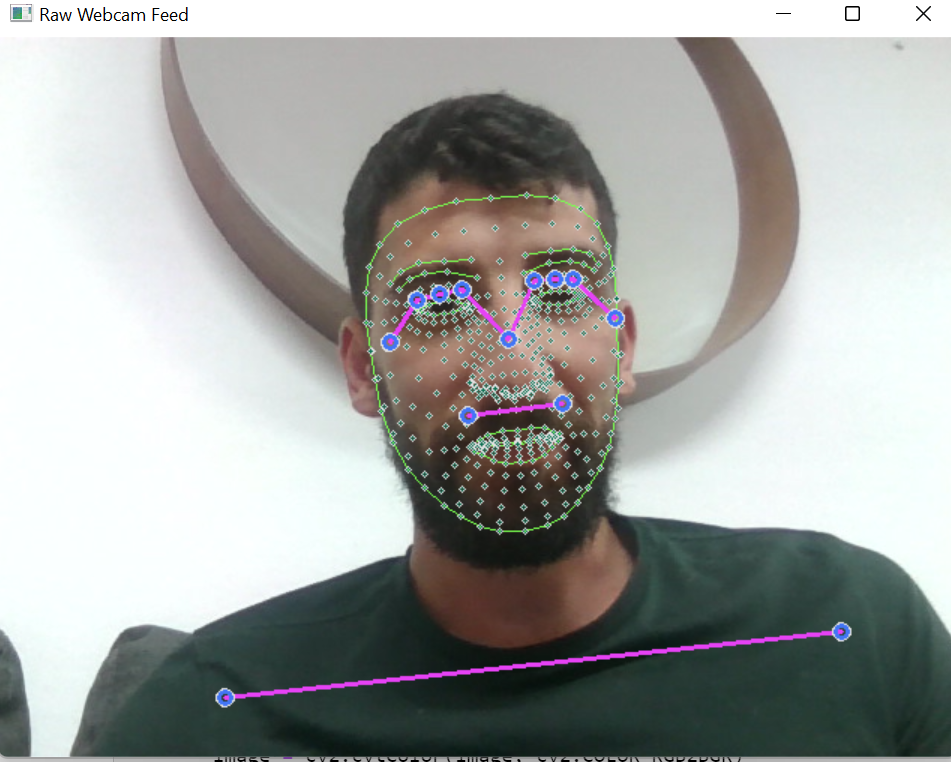

In [6]:
import csv
import os
import numpy as np

In [7]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [8]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [9]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [16]:
class_name = "Bye"

In [17]:
cap = cv2.VideoCapture(0)
cv2.namedWindow("Window")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while True:
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('coords.csv')

In [21]:
df.tail()

class        x1        y1        z1        v1        x2        y2  \
797   Bye  0.540017  0.478778 -0.905136  0.999930  0.564569  0.419691   
798   Bye  0.537998  0.475560 -0.837324  0.999925  0.560588  0.416038   
799   Bye  0.535905  0.467784 -0.845547  0.999918  0.557071  0.407572   
800   Bye  0.535790  0.466398 -0.781935  0.999920  0.556731  0.403807   
801   Bye  0.536867  0.464437 -0.801735  0.999910  0.557065  0.400488   

           z2        v2        x3  ...      z499  v499      x500      y500  \
797 -0.839006  0.999844  0.577820  ... -0.005512   0.0  0.589002  0.408552   
798 -0.766651  0.999833  0.574144  ... -0.005083   0.0  0.584230  0.402204   
799 -0.775303  0.999815  0.570761  ... -0.004603   0.0  0.580546  0.400391   
800 -0.713996  0.999817  0.570420  ... -0.002901   0.0  0.583422  0.393393   
801 -0.737136  0.999791  0.570705  ... -0.003076   0.0  0.584109  0.393532   

         z500  v500      x501      y501      z501  v501  
797  0.014356   0.0  0.593249  0.405579  0.014538   0.0  
798  0.015224   0.0  0.588618  0.399363  0.015412   0.0  
799  0.015173   0.0  0.584843  0.397295  0.015330   0.0  
800  0.018616   0.0  0.587533  0.389780  0.019038   0.0  
801  0.018703   0.0  0.588327  0.389618  0.019206   0.0  

[5 rows x 2005 columns]

In [22]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [24]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [26]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [27]:
fit_models['rc'].predict(X_test)

array(['hello', 'hello', 'Bye', 'hello', 'Bye', 'Bye', 'hello', 'hello',
       'hello', 'Bye', 'Bye', 'hello', 'hello', 'Bye', 'Bye', 'hello',
       'Bye', 'Bye', 'hello', 'Bye', 'hello', 'Bye', 'Bye', 'Bye', 'Bye',
       'hello', 'Bye', 'hello', 'hello', 'hello', 'Bye', 'Bye', 'Bye',
       'Bye', 'hello', 'Bye', 'hello', 'hello', 'Bye', 'Bye', 'hello',
       'hello', 'Bye', 'hello', 'hello', 'Bye', 'Bye', 'Bye', 'hello',
       'hello', 'Bye', 'Bye', 'hello', 'Bye', 'hello', 'hello', 'hello',
       'hello', 'Bye', 'Bye', 'Bye', 'Bye', 'hello', 'hello', 'Bye',
       'Bye', 'hello', 'Bye', 'hello', 'hello', 'Bye', 'hello', 'Bye',
       'Bye', 'hello', 'Bye', 'hello', 'hello', 'hello', 'Bye', 'hello',
       'hello', 'Bye', 'Bye', 'Bye', 'Bye', 'hello', 'hello', 'Bye',
       'Bye', 'hello', 'Bye', 'Bye', 'Bye', 'Bye', 'Bye', 'hello',
       'hello', 'Bye', 'hello', 'Bye', 'hello', 'Bye', 'Bye', 'hello',
       'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'Bye',
       '

In [28]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [29]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 0.991701244813278


In [30]:
fit_models['rf'].predict(X_test)

array(['hello', 'hello', 'Bye', 'hello', 'Bye', 'Bye', 'hello', 'hello',
       'hello', 'Bye', 'Bye', 'hello', 'hello', 'Bye', 'Bye', 'hello',
       'Bye', 'Bye', 'hello', 'Bye', 'hello', 'Bye', 'Bye', 'Bye', 'Bye',
       'hello', 'Bye', 'hello', 'hello', 'hello', 'Bye', 'Bye', 'Bye',
       'Bye', 'hello', 'Bye', 'hello', 'hello', 'Bye', 'Bye', 'hello',
       'hello', 'Bye', 'hello', 'hello', 'Bye', 'Bye', 'Bye', 'hello',
       'hello', 'Bye', 'Bye', 'hello', 'Bye', 'hello', 'hello', 'hello',
       'hello', 'Bye', 'Bye', 'Bye', 'Bye', 'hello', 'hello', 'Bye',
       'Bye', 'hello', 'Bye', 'hello', 'hello', 'Bye', 'hello', 'Bye',
       'Bye', 'hello', 'Bye', 'hello', 'hello', 'hello', 'Bye', 'hello',
       'hello', 'Bye', 'Bye', 'Bye', 'Bye', 'hello', 'hello', 'Bye',
       'Bye', 'hello', 'Bye', 'Bye', 'Bye', 'Bye', 'Bye', 'hello',
       'hello', 'Bye', 'hello', 'Bye', 'hello', 'Bye', 'Bye', 'hello',
       'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'Bye',
       '

In [33]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [34]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
cap = cv2.VideoCapture(0)
cv2.namedWindow("Window")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while True:
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

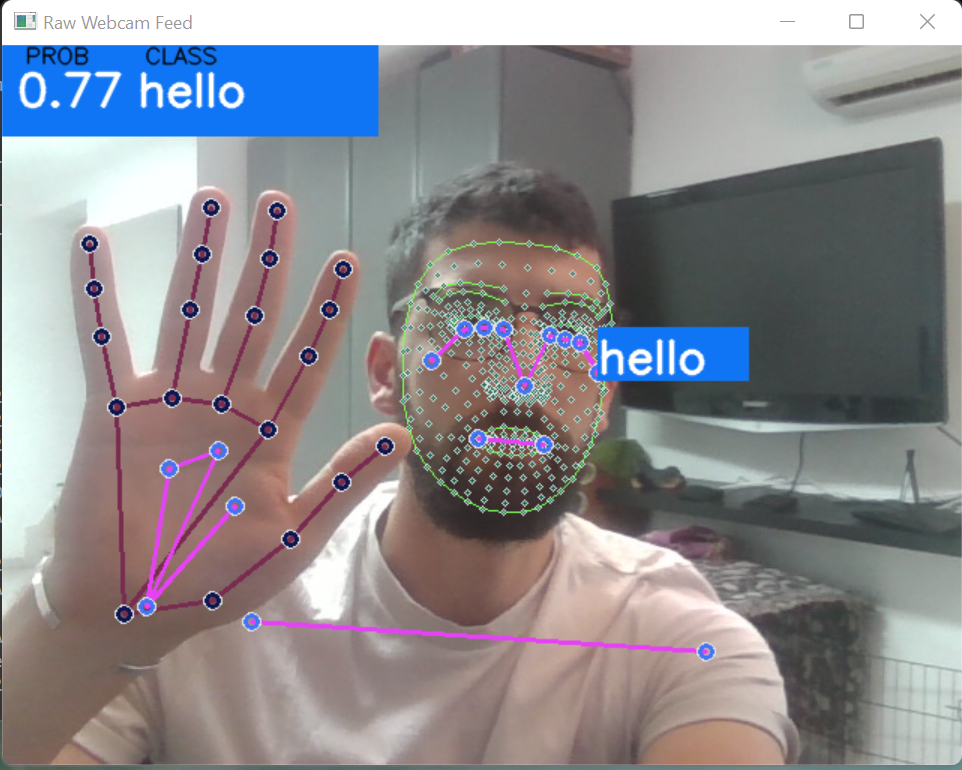

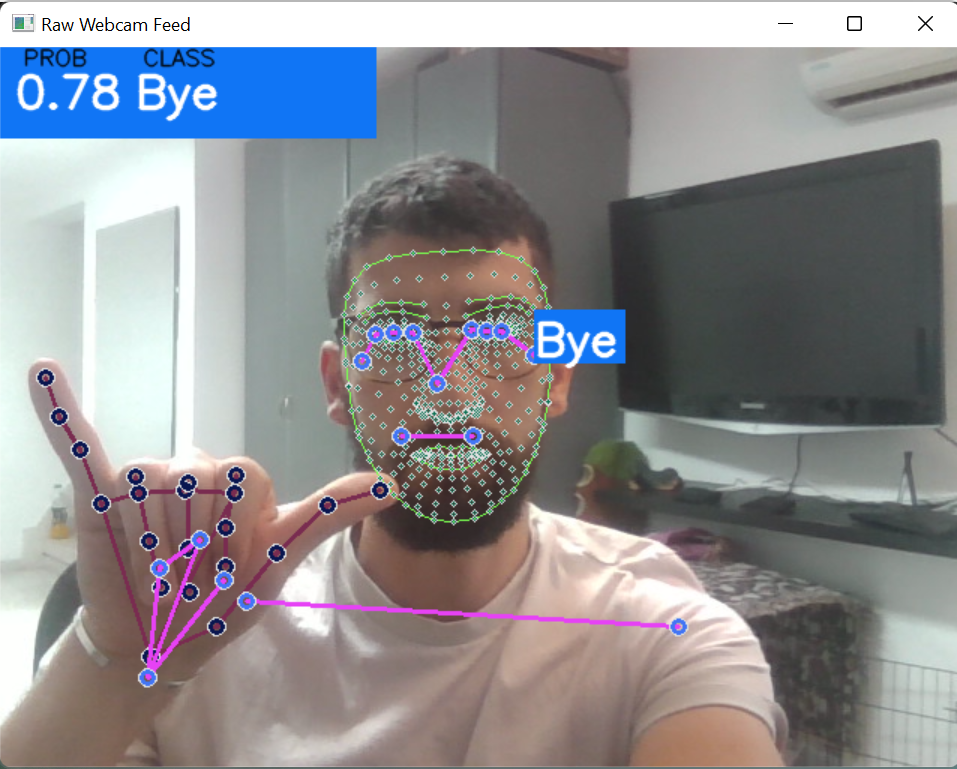